## Importando Bibliotecas

In [1]:
#Importando as bibliotecas utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_auc_score,roc_curve, classification_report,confusion_matrix,f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score #acuracia
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score #recall
from sklearn.metrics import f1_score #f1-score
from sklearn.metrics import roc_auc_score #area sob curva roc
from sklearn.metrics import roc_curve #curva roc

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
import missingno as missing
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold 
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot #grafico

## Criando Driver no Colab


In [2]:
#Criando drive no colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Validando a pasta de onde está composto os arquivos de treino e test e aonde irei salvar o .ipynb
import os
os.chdir("/content/drive/My Drive/Competição FLAI")
!ls

1_5096068538829898114.pdf  Emmanuel_4.ipynb   submissao_Emmanuel.ipynb
Emmanuel_2.ipynb	   sub_Emmanuel1.csv  teste.csv
Emmanuel_3.ipynb	   sub_Emmanuel2.csv  treino.csv


## Lendo arquivos

In [3]:
# importanto os conjuntos de dados disponíveis nesta mesma pasta Data
treino = pd.read_csv('/content/drive/My Drive/Competição FLAI/treino.csv')
sub = pd.read_csv('/content/drive/My Drive/Competição FLAI/teste.csv')

In [4]:
print("Valores no Conjunto de TREINO:\n")
print(treino.info())

Valores no Conjunto de TREINO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            2500 non-null   object
 1   SeniorCitizen     2500 non-null   int64 
 2   Partner           2500 non-null   object
 3   Dependents        2500 non-null   object
 4   tenure            2500 non-null   int64 
 5   PhoneService      2500 non-null   object
 6   MultipleLines     2500 non-null   object
 7   InternetService   2500 non-null   object
 8   OnlineSecurity    2500 non-null   object
 9   OnlineBackup      2500 non-null   object
 10  DeviceProtection  2500 non-null   object
 11  TechSupport       2500 non-null   object
 12  StreamingTV       2500 non-null   object
 13  StreamingMovies   2500 non-null   object
 14  Contract          2500 non-null   object
 15  PaperlessBilling  2500 non-null   object
 16  PaymentMethod     2500 non-n

In [5]:
print("\n\nValores no Conjunto da Submissão:\n")
print(sub.info())



Valores no Conjunto da Submissão:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            2500 non-null   object
 1   SeniorCitizen     2500 non-null   int64 
 2   Partner           2500 non-null   object
 3   Dependents        2500 non-null   object
 4   tenure            2500 non-null   int64 
 5   PhoneService      2500 non-null   object
 6   MultipleLines     2500 non-null   object
 7   InternetService   2500 non-null   object
 8   OnlineSecurity    2500 non-null   object
 9   OnlineBackup      2500 non-null   object
 10  DeviceProtection  2500 non-null   object
 11  TechSupport       2500 non-null   object
 12  StreamingTV       2500 non-null   object
 13  StreamingMovies   2500 non-null   object
 14  Contract          2500 non-null   object
 15  PaperlessBilling  2500 non-null   object
 16  PaymentMethod     2500 

In [6]:
coluna_numerica = treino.columns[treino.dtypes == "int64"] #Colunas de variáveis numericas
coluna_object = treino.columns[treino.dtypes == "object"] #Colunas do tipo numéricas

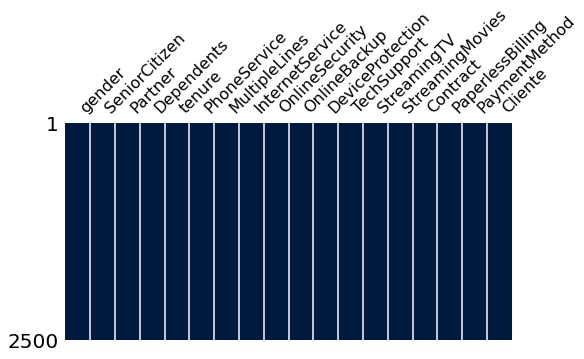

In [7]:
missing.matrix(treino, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

In [8]:
for i in coluna_object:
  print("Coluna: ",i)
  print(treino[i].value_counts(), "\n")

Coluna:  gender
Male      1285
Female    1215
Name: gender, dtype: int64 

Coluna:  Partner
No     1278
Yes    1222
Name: Partner, dtype: int64 

Coluna:  Dependents
No     1754
Yes     746
Name: Dependents, dtype: int64 

Coluna:  PhoneService
Yes    2261
No      239
Name: PhoneService, dtype: int64 

Coluna:  MultipleLines
No                  1236
Yes                 1025
No phone service     239
Name: MultipleLines, dtype: int64 

Coluna:  InternetService
Fiber optic    1079
DSL             880
No              541
Name: InternetService, dtype: int64 

Coluna:  OnlineSecurity
No                     1253
Yes                     706
No internet service     541
Name: OnlineSecurity, dtype: int64 

Coluna:  OnlineBackup
No                     1114
Yes                     845
No internet service     541
Name: OnlineBackup, dtype: int64 

Coluna:  DeviceProtection
No                     1089
Yes                     870
No internet service     541
Name: DeviceProtection, dtype: int64 

Colu

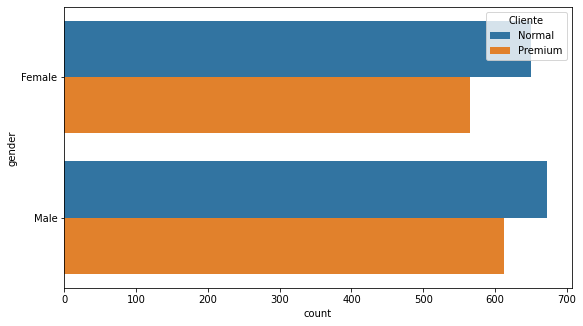

In [9]:
f, ax = plt.subplots(figsize=(20, 30))
for i in range(1,2):
  plt.subplot(5,2,i)
  sns.countplot(data = treino, y=coluna_object[0], hue='Cliente')

In [10]:
def auxiliar(x):
    if x <= 3:
        return '0-3'
    elif x <= 6:
        return '4-6'
    else:
        return '7-10'

treino['tenure'] = treino['tenure'].apply(auxiliar)

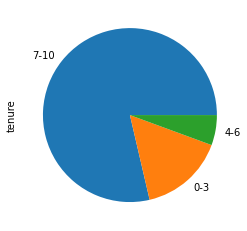

In [11]:
treino['tenure'].value_counts().plot(kind = 'pie');

In [12]:
pd.get_dummies(treino['tenure'])

,0-3,4-6,7-10
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
2495,0,0,1
2496,0,0,1
2497,0,0,1
2498,0,0,1


## Criando Coluna nova para analises.
Transformando os dados Normais e Premiuns em variaveis numericas 

In [13]:
encoder=LabelEncoder()

transform = treino.dtypes[treino.dtypes == 'object'].keys()
for col in transform:
    if col !="Cliente":
      treino[col] = encoder.fit_transform(list(treino[col].values.astype('str')))
    


dic_cliente = {'Normal':0,'Premium':1}
treino['Cliente1']=treino['Cliente'].map(dic_cliente)

treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente,Cliente1
0,0,0,0,0,2,1,0,2,1,1,1,1,1,1,2,0,3,Normal,0
1,0,0,1,1,2,1,2,0,2,2,0,2,0,0,1,0,3,Premium,1
2,0,0,1,1,2,0,1,0,0,2,2,2,2,2,2,0,1,Premium,1
3,0,0,0,1,2,1,2,0,0,0,0,0,0,0,0,0,3,Premium,1
4,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,Normal,0


## Separando o modelo de treino e teste

In [14]:
dados_ml = treino.iloc[:1999]
dados_validacao=treino.iloc[2000:]

In [15]:
X=dados_ml.drop(columns=['Cliente','Cliente1'],axis=1)
y=dados_ml['Cliente1']

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,y,shuffle=True,test_size=0.5,random_state=42)

In [16]:
#Benchmark
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_treino, Y_treino)
y_pred = dummy_clf.predict(X_teste)
acuracia = dummy_clf.score(X_teste, Y_teste) * 100

print('A acurácia do dummy mostfrequent foi %.2f%%' % acuracia)

A acurácia do dummy mostfrequent foi 52.60%


## Testando Modelos

In [17]:
#Testando outros modelos
lista_classificacores = [ LogisticRegression(),
                         GaussianNB(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(),
                         RandomForestClassifier(n_estimators=50, max_depth = 5),
                         RandomForestClassifier(n_estimators=50, max_depth = 7),
                         RandomForestClassifier(n_estimators=100, max_depth = 5),
                         RandomForestClassifier(n_estimators=100, max_depth = 7),
                         XGBClassifier(),
                         DecisionTreeClassifier(max_depth = 3),
                         DecisionTreeClassifier(max_depth = 5),
                         DecisionTreeClassifier(max_depth = 7),
                         BaggingClassifier(),
                         KNeighborsClassifier(n_neighbors = 5),
                         KNeighborsClassifier(n_neighbors = 15),
                         KNeighborsClassifier(n_neighbors = 25)
                         ]




for clf in lista_classificacores:
  print(clf.__class__.__name__)
  cv=KFold(n_splits=10, random_state=0, shuffle=True)
  clf.fit(X_treino, Y_treino)
  train_acc = clf.score(X_treino, Y_treino)
  val_score = cross_val_score(clf, X_treino, Y_treino, cv=cv)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Validation score', val_score.mean())
  print('Teste:', test_acc)

  print('F1 Score')

  y_pred_treino = clf.predict(X_treino)
  f1_treino = f1_score(Y_treino, y_pred_treino)
  print('Treino', f1_treino)

  y_pred_teste = clf.predict(X_teste)
  f1_teste = f1_score(Y_teste,y_pred_teste)
  print('Test', f1_teste)
  print('='*50)

LogisticRegression
Treino: 0.8538538538538538
Validation score 0.8478282828282829
Teste: 0.84
F1 Score
Treino 0.830232558139535
Test 0.828693790149893
GaussianNB
Treino: 0.6636636636636637
Validation score 0.6636464646464646
Teste: 0.689
F1 Score
Treino 0.7195325542570952
Test 0.7529785544082606
DecisionTreeClassifier
Treino: 0.986986986986987
Validation score 0.8558282828282829
Teste: 0.811
F1 Score
Treino 0.984759671746776
Test 0.7952329360780065
RandomForestClassifier
Treino: 0.986986986986987
Validation score 0.8698888888888888
Teste: 0.869
F1 Score
Treino 0.9849012775842044
Test 0.8642487046632126
RandomForestClassifier
Treino: 0.8958958958958959
Validation score 0.8758888888888888
Teste: 0.865
F1 Score
Treino 0.8799076212471131
Test 0.8601036269430051
RandomForestClassifier
Treino: 0.9259259259259259
Validation score 0.87389898989899
Teste: 0.866
F1 Score
Treino 0.913953488372093
Test 0.8609958506224067
RandomForestClassifier
Treino: 0.8968968968968969
Validation score 0.87591919

In [18]:
##Testando outras formas de modelagem
lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7)]

nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 2)',
                        'Random Forest (arvs = 50, prof = 3)',
                        'Random Forest (arvs = 100, prof = 2)', 
                        'Random Forest (arvs = 100, prof = 3)']

resultados0 = {}

validacao = StratifiedKFold(n_splits = 10)


for i in range(len(lista_de_modelos)):
    print('Rodando modelo: ' + nome_dos_modelos[i])
    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, f1s, bac]
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 2)
Rodando modelo: Random Forest (arvs = 50, prof = 3)
Rodando modelo: Random Forest (arvs = 100, prof = 2)
Rodando modelo: Random Forest (arvs = 100, prof = 3)


In [19]:
resultados.sort_values(by = 'f1-score', ascending = False)

,acurácia,sensibilidade,precisão,eficiência,f1-score
"Random Forest (arvs = 50, prof = 3)",0.870442,0.877314,0.843944,0.859519,0.871013
"Random Forest (arvs = 100, prof = 3)",0.870450,0.871832,0.847593,0.858867,0.870561
"Random Forest (arvs = 100, prof = 2)",0.865437,0.880623,0.832959,0.855557,0.866738
"Random Forest (arvs = 50, prof = 2)",0.865442,0.878400,0.835012,0.855374,0.866536
Árvore (prof = 7),0.864442,0.867363,0.839423,0.852551,0.864686
Bagging,0.856432,0.833150,0.847903,0.839926,0.854427
Árvore (prof = 5),0.849917,0.886105,0.804158,0.842037,0.853015
15-NN,0.853450,0.840965,0.839105,0.838565,0.852396
Regressão Logística,0.847935,0.828547,0.835986,0.831159,0.846192
25-NN,0.845427,0.825421,0.834781,0.828556,0.843728


## Criando Funções


In [20]:
def MetricasClassBinaria(observado, predito):

    mc = confusion_matrix(observado, predito)
    vn, fp, fn, vp = mc.flatten()

    pre = observado.mean()
    acc = (vn + vp)/(vn + fp + fn + vp) 
    sen = vp/(vp + fn)
    esp = vn/(vn + fp)
    vpp = vp/(vp + fp)
    vpn = vn/(vn + fn) 
    mcc = (vp*vn - fp*fn)/np.sqrt((vp + fp)*(vp + fn)*(vn + fp)*(vn + fn))
    f1s = 2*vpp*sen/(vpp + sen) 
    efi = (sen + esp)/2

    print('  Prevalência de Positivos: {:.4f}'.format(pre))
    print('                  Acurácia: {:.4f}'.format(acc))
    print('             Sensibilidade: {:.4f}'.format(sen))
    print('            Especificidade: {:.4f}'.format(esp))
    print('  Valor Preditivo Positivo: {:.4f}'.format(vpp))
    print('  Valor Preditivo Negativo: {:.4f}'.format(vpn))
    print('Coef. de Corr. de Matthews: {:.4f}'.format(mcc))
    print('                  F1-Score: {:.4f}'.format(f1s))
    print('                Eficiência: {:.4f}'.format(efi))
 
    metricas = {'prevalência': pre, 'acurácia': acc, 'sensibilidade': sen, 
            'especificidade': esp, 'vpp': vpp, 'vpn': vpn, 'mcc': mcc,
            'f1-score': f1s, 'eficiência': efi}
 
    return metricas

In [21]:
def accuracy(confusion_matrix):
    sum, total = 0,0
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[0])):
            if i == j: 
                sum += confusion_matrix[i,j]
            total += confusion_matrix[i,j]
    return sum/total

##RandomForestClassifier

In [22]:
#Ajustando Random
clf1 = RandomForestClassifier(n_estimators = 200, max_depth = 7) 

X=dados_ml.drop(columns=['Cliente','Cliente1'],axis=1)
y=dados_ml['Cliente1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf1.fit(X_train,y_train)
y_pred1=clf1.predict(X_test)

print('RandomForestClassifier : {}'.format(y_pred1))
print('-')
print('='*30)

RandomForestClassifier : [0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0
 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1
 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0
 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0
 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0
 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1


A acurácia do RandomForestClassifier foi 91.78%


Text(33.0, 0.5, 'Real ( 1 ou 0)')

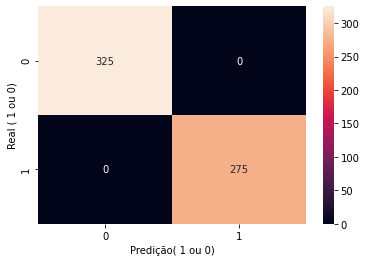

In [23]:
#Matrix de Confusão Randon
cm=confusion_matrix(y_pred1, y_pred1)
sns.heatmap(cm, annot=True, fmt='g')
y_pred1 = clf1.predict(X_train)
acuracia = clf1.score(X_train, y_train) * 100

print('A acurácia do RandomForestClassifier foi %.2f%%' % acuracia)

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [24]:
rf_classifier = RandomForestClassifier(n_estimators = 138, criterion = 'entropy')
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

rf_cm = confusion_matrix(y_pred, y_test)

print('matriz de confusão:')
print(rf_cm,'\n')
print('precisão: ',accuracy(rf_cm)*100, '%')

matriz de confusão:
[[283  39]
 [ 39 239]] 

precisão:  87.0 %


##Fazendo as previsões



In [ ]:
dados_validacao.head()

In [31]:
X_val=dados_validacao.drop(columns=['Cliente','Cliente1'],axis=1)
y_val=dados_validacao['Cliente1']

In [47]:
# Random
clf1 = RandomForestClassifier(n_estimators =8, max_depth =11) 

X=dados_ml.drop(columns=['Cliente','Cliente1'],axis=1)
y=dados_ml['Cliente1']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf1.fit(X,y)

y_pred_validacao1=clf1.predict(X_test)
print(classification_report(y_test, y_pred_validacao1))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       322
           1       0.96      0.98      0.97       278

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [ ]:
transform_2 = sub.dtypes[sub.dtypes == 'object'].keys()
for col in transform_2:
  sub[col] = encoder.fit_transform(list(sub[col].values.astype('str')))
    
sub.head()

In [49]:
#submission1
previsao=clf1.predict(sub)

subm = pd.DataFrame()
subm['Cliente'] = previsao
subm.to_csv('/content/drive/My Drive/Competição FLAI/sub_Emmanuel3.csv', index = False)

In [50]:
subm

,Cliente
0,0
1,1
2,0
3,1
4,1
...,...
2495,1
2496,0
2497,0
2498,0
